# Convolutional Neural Networks

### Convolutions

Like you have seen on the course edx pages, the basic building block of CNNs is the convolution operation. For 2D (black and white) images, the *kernel* or *filter* is a small grid of numbers (matrix) which is used to detect features in the input image. Luckily, this process is easy to implement and visualize in Python.

![ConvURL](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif "Michael Plotke. CC-BY 3.0")

In [2]:
import numpy as np
from scipy import signal
from scipy import misc
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
cd = Path.cwd()
fn = cd / "assets" / "harbour.jpg"
if fn.exists(): print(f'File {fn} located.')

img = np.array(Image.open(fn).convert('L')) #converted to grayscale for simplicity

File C:\Users\Peder\Documents\CBM-101\CBM101\H_Neural_Networks\assets\harbour.jpg located.


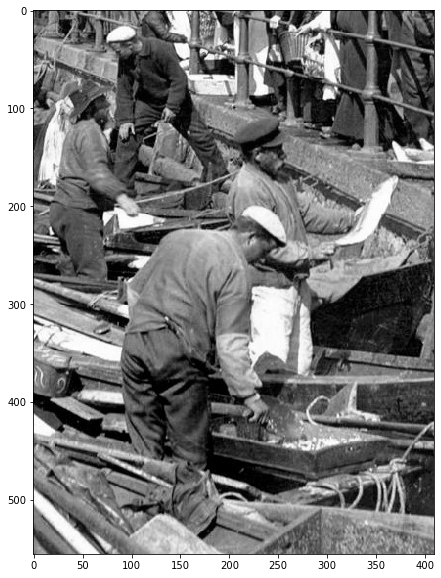

In [4]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [52]:
## Uncomment the different kernels and see how they affect the images.

kernel = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

#kernel = np.array([[.5,1,.5],
#                   [1,2,1],
#                   [.5,1,.5]])

#kernel = np.array([[-1,-1,-1],
#                   [1,1,1],
#                   [0,0,0]])

output = signal.convolve2d(img, kernel, mode='same')

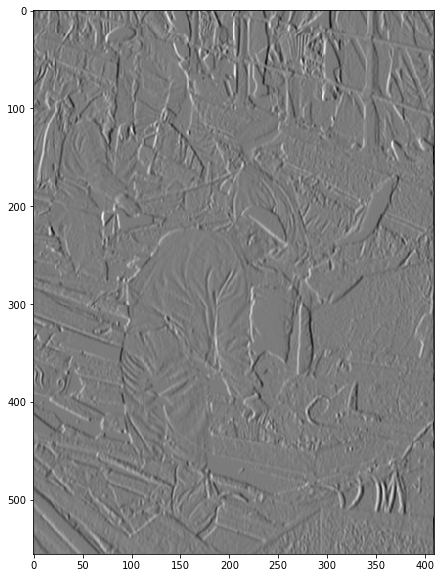

In [54]:
fig = plt.figure(figsize=(10,10))
plt.imshow(output, cmap='gray')
plt.show()

This kernel is a common *edge detecting* kernel, identifying specifically vertical edges.

#### Ex.1: a) Change the kernel so that it will display horisontal edges instead of vertical ones. b) What happens if you convolve the input with the following kernel?
$$
  K =
  \left[ {\begin{array}{ccc}
   0 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 0 \\
  \end{array} } \right]
$$

The output image above is known as a *feature map*. Multiple such maps are created from the input layer in CNNs. After passing it through an activation function (e.g. ReLU), the next standard step is max-pooling, reducing the size of the feature maps. Typically, these steps (convolution-ReLU-pooling) are repeated a number of times, before it is relayed to a fully connected layer at the end (an ordinary multilayer perceptron). 

Luckily we don't have to worry about deciding this kernel - this is exactly what the CNN learn during training!

![Aphex34 CC-BY 4.0](assets/end_to_end_modified_from_Aphex34_CCBYSA4.0.png)
*Aphex34 CC-BY 4.0* 

In [56]:
### Here add stuff from Seili notebook